## frequency table histogram


In [6]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
sns.set()

In [8]:
# https://rdrr.io/cran/reshape2/man/tips.html
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### frequency table


In [9]:
### calculate number_of_bins with Sturges' rule
sample_size = len(df)
number_of_bins = round(math.log2(sample_size) + 1)

tip_series = df["tip"]
bins = np.linspace(0, np.amax(tip_series), number_of_bins)
freq = tip_series.value_counts(bins=bins, sort=False)

class_value = (bins[:-1] + bins[1:]) / 2
rel_freq = freq / tip_series.count()
cum_freq = freq.cumsum()
rel_cum_freq = rel_freq.cumsum()

frequency_table = pd.DataFrame(
    {
        "class_value": class_value,
        "freq": freq,
        "rel_freq": rel_freq,
        "cum_freq": cum_freq,
        "rel_cum_freq": rel_cum_freq,
    },
    index=freq.index,
)
frequency_table

,class_value,freq,rel_freq,cum_freq,rel_cum_freq
"(-0.001, 1.25]",0.625,10,0.040984,10,0.040984
"(1.25, 2.5]",1.875,98,0.401639,108,0.442623
"(2.5, 3.75]",3.125,80,0.327869,188,0.770492
"(3.75, 5.0]",4.375,38,0.155738,226,0.926230
"(5.0, 6.25]",5.625,11,0.045082,237,0.971311
"(6.25, 7.5]",6.875,4,0.016393,241,0.987705
"(7.5, 8.75]",8.125,1,0.004098,242,0.991803
"(8.75, 10.0]",9.375,2,0.008197,244,1.000000


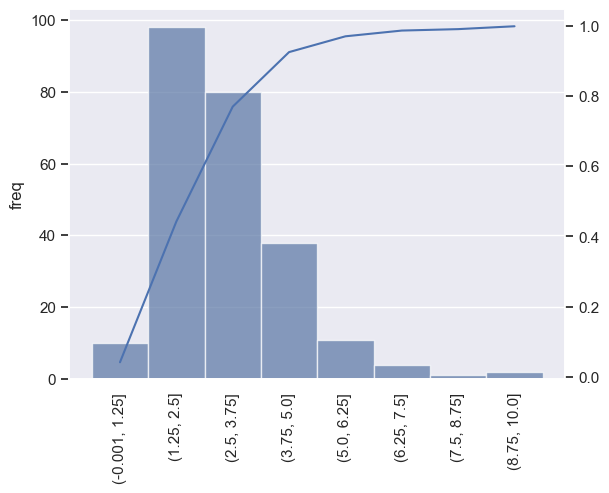

In [10]:
fig, axes = plt.subplots()

sns.barplot(
    data=frequency_table,
    x=frequency_table.index,
    y="freq",
    width=1,
    color="b",
    alpha=0.7,
    ax=axes,
)
plt.xticks(rotation=90)
axes_2 = axes.twinx()
rel_cum_freq.plot(ax=axes_2)
axes_2.grid(False)